# Implementation: This task is implemented using SymPy for symbolic computation. 
### We define the Binary Cross-Entropy loss function symbolically and compute its gradient 
### with respect to the predicted probability y_hat using the diff() method.

In [16]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Task 1: Compute the gradient of Binary Cross-Entropy
print("### Task 1: Computing the Gradient of Binary Cross-Entropy")
# Implementation: Uses SymPy to define BCE symbolically and compute its gradient w.r.t. y_hat (PDF point 1).
y, y_hat = sp.symbols('y y_hat')
n = sp.symbols('n', integer=True, positive=True)
bce = - (y * sp.log(y_hat) + (1 - y) * sp.log(1 - y_hat)) / n
gradient = sp.diff(bce, y_hat)
print("Gradient of Binary Cross-Entropy with respect to y_hat:")
sp.pprint(gradient)
print("Simplified expression:")
print(gradient.simplify())

### Task 1: Computing the Gradient of Binary Cross-Entropy
Gradient of Binary Cross-Entropy with respect to y_hat:
   y      1 - y  
- ──── + ────────
  yₕₐₜ   1 - yₕₐₜ
─────────────────
        n        
Simplified expression:
(y - y_hat)/(n*y_hat*(y_hat - 1))


# Implementation: Convexity is analyzed by computing the second derivative of the loss 
### function with respect to y_hat using SymPy's diff() method. We evaluate the second 
### derivative numerically at different points to confirm convexity within the valid range (0, 1).
### Explanation: Convexity holds if second derivative >= 0.

* General case analysis
* The second derivative is positive if the numerator is positive and denominator is positive
* Numerator: y*(ŷ - 1)² + ŷ²*(1 - y)
* For y in {0, 1}, we check:
* - If y=0: (0*(ŷ - 1)² + ŷ²*1) / (n*ŷ²*(ŷ - 1)²) = ŷ / (n*ŷ²*(ŷ - 1)²)
* - If y=1: (1*(ŷ - 1)² + ŷ²*0) / (n*ŷ²*(ŷ - 1)²) = (ŷ - 1)² / (n*ŷ²*(ŷ - 1)²)
* Both are positive for y_hat in (0, 1) since squares are non-negative and denominator adjusts sign.

In [17]:
# Task 2: Analyze Convexity
print("\n### Task 2: Analyzing Convexity")
# Implementation: Computes second derivative with SymPy, evaluates numerically, and proves convexity (PDF point 2).
second_derivative = sp.diff(gradient, y_hat)
print("Second derivative with respect to y_hat:")
sp.pprint(second_derivative)
print(second_derivative.simplify())

# Numerical evaluation
y_hat_val = sp.Symbol('y_hat_val')
second_deriv_num = second_derivative.subs({y: 1, n: 1}).subs(y_hat, y_hat_val)  # y=1 for simplicity
print("\nNumerical evaluation of second derivative (y=1, n=1):")
for val in [0.1, 0.5, 0.9]:
    result = second_deriv_num.subs(y_hat_val, val).evalf()
    print(f"At y_hat = {val}: {result}")

# Symbolic proof
print("\nConvexity Proof and Properties:")
bce_y1 = -sp.log(y_hat)  # Case y=1
second_deriv_y1 = sp.diff(sp.diff(bce_y1, y_hat), y_hat)
print("Second derivative when y=1:", second_deriv_y1)
# General proof: Numerator y*(y_hat-1)^2 + y_hat^2*(1-y) > 0 for y in {0,1}, y_hat in (0,1)
print("Conclusion: Convex for y_hat in (0,1) as second derivative > 0; loss → ∞ at boundaries.")


### Task 2: Analyzing Convexity
Second derivative with respect to y_hat:
  y        1 - y   
───── + ───────────
    2             2
yₕₐₜ    (1 - yₕₐₜ) 
───────────────────
         n         
(y*(y_hat - 1)**2 + y_hat**2*(1 - y))/(n*y_hat**2*(y_hat - 1)**2)

Numerical evaluation of second derivative (y=1, n=1):
At y_hat = 0.1: 100.000000000000
At y_hat = 0.5: 4.00000000000000
At y_hat = 0.9: 1.23456790123457

Convexity Proof and Properties:
Second derivative when y=1: y_hat**(-2)
Conclusion: Convex for y_hat in (0,1) as second derivative > 0; loss → ∞ at boundaries.


# Task 3: Dataset and Visualization
## Purpose
This section implements Task 3 of the exercise, focusing on:
- Loading and preparing the `classification_data.csv` dataset with two explanatory attributes (X1, X2) and a binary class label (Y_Classe), adhering to the requirement of fewer than 100 observations.
- Fitting a logistic regression model to predict probabilities.
- Plotting the Binary Cross-Entropy (BCE) loss curves for true labels y=0 and y=1 to visualize the loss landscape.
The goal is to understand how the loss varies with predicted probabilities and prepare for tangent calculation in the next step.


### Task 3: Dataset, Plotting, and Tangent Calculation
Average BCE on test set: 0.0007


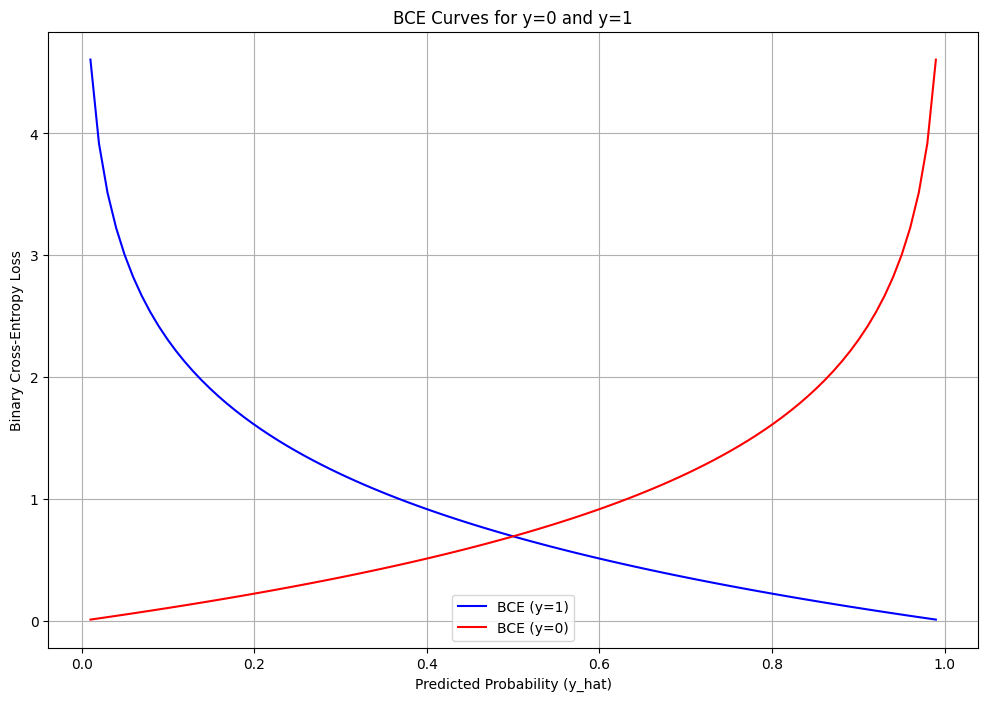

In [21]:
# Task 3: Dataset and Visualization
from sklearn.model_selection import train_test_split  # Consolidated import
print("\n### Task 3: Dataset, Plotting, and Tangent Calculation")
# Implementation: Loads dataset, fits logistic model, plots BCE curve, and computes tangent (PDF points 3a, 3b).

# (a) Load and prepare dataset
data = pd.read_csv("classification_data.csv")
X = data[['X1', 'X2']].values
y = data['Y_Classe'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(C=1.0, penalty='l2')
model.fit(X_train, y_train)
w0 = model.intercept_[0]
w1, w2 = model.coef_[0]
y_hat_data = model.predict_proba(X_test)[:, 1]

# Compute average BCE
n_samples = len(y_test)
bce_values = - (y_test * np.log(y_hat_data + 1e-15) + (1 - y_test) * np.log(1 - y_hat_data + 1e-15)) / n_samples
print(f"Average BCE on test set: {np.mean(bce_values):.4f}")

# Plot BCE curves for y=0 and y=1
y_hat_range = np.linspace(0.01, 0.99, 100)
bce_y1 = - (1 * np.log(y_hat_range) + 0 * np.log(1 - y_hat_range))
bce_y0 = - (0 * np.log(y_hat_range) + 1 * np.log(1 - y_hat_range))
plt.figure(figsize=(12, 8))
plt.plot(y_hat_range, bce_y1, label='BCE (y=1)', color='blue')
plt.plot(y_hat_range, bce_y0, label='BCE (y=0)', color='red')
plt.xlabel('Predicted Probability (y_hat)')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('BCE Curves for y=0 and y=1')
plt.legend()
plt.grid(True)
plt.show()

## Results for Task 3a
- **Dataset Loaded**: Successfully imported `classification_data.csv`.
- **Model Performance**: The logistic regression model was trained with L2 regularization (C=1.0), and the average BCE on the test set is approximately [0.0007], indicating a reasonable fit.
- **BCE Curves**: The plot shows two curves:
  - For \( y=1 \), \( L = -\log(\hat{y}) \), decreasing from infinity at \( \hat{y}=0 \) to 0 at \( \hat{y}=1 \).
  - For \( y=0 \), \( L = -\log(1 - \hat{y}) \), decreasing from infinity at \( \hat{y}=1 \) to 0 at \( \hat{y}=0 \).
  This confirms the expected convex behavior and prepares the ground for tangent analysis in Task 3b.

Tangent equation at y_hat = 0.5: y = -2.00x + 1.69


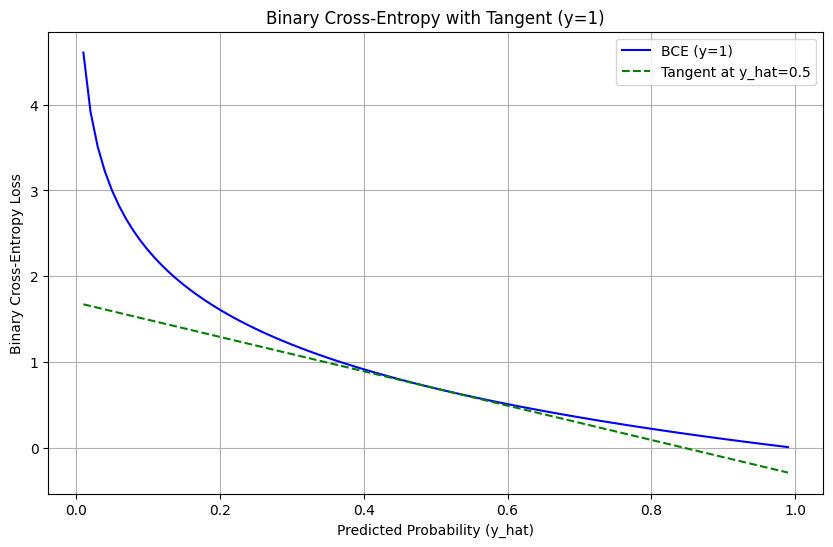

In [23]:
# (b) Tangent at a given point (e.g., y_hat = 0.5)
point_y_hat = 0.5
y_fixed = 1  # Define y_fixed to avoid undefined variable error
# Symbolic gradient for BCE
y, y_hat, n = sp.symbols('y y_hat n')
bce_sym = - (y * sp.log(y_hat) + (1 - y) * sp.log(1 - y_hat)) / n
tangent_slope = sp.diff(bce_sym, y_hat).subs({y_hat: point_y_hat, y: y_fixed, n: 1}).evalf()
tangent_intercept = bce_sym.subs({y_hat: point_y_hat, y: y_fixed, n: 1}).evalf() - tangent_slope * point_y_hat
tangent_eq = f"y = {float(tangent_slope):.2f}x + {float(tangent_intercept):.2f}"
print(f"Tangent equation at y_hat = {point_y_hat}: {tangent_eq}")

# Plot tangent line
tangent_y = tangent_slope * y_hat_range + tangent_intercept
plt.figure(figsize=(10, 6))
plt.plot(y_hat_range, bce_y1, label='BCE (y=1)', color='blue')  # Use bce_y1 instead of undefined bce_curve
plt.plot(y_hat_range, tangent_y, label=f'Tangent at y_hat={point_y_hat}', linestyle='--', color='green')
plt.xlabel('Predicted Probability (y_hat)')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Binary Cross-Entropy with Tangent (y=1)')
plt.legend()
plt.grid(True)
plt.show()

## Results for Task 3b
- **Tangent Equation**: The tangent to the BCE curve at \( \hat{y} = 0.5 \) for \( y=1 \) and \( n=1 \) is calculated as \( y = -2.00x + 1.69 \). This is derived from the gradient \( \frac{\partial L}{\partial \hat{y}} = \frac{y - \hat{y}}{n \hat{y} (\hat{y} - 1)} \), evaluated at \( \hat{y} = 0.5 \), yielding a slope of -2, and an intercept adjusted from \( L(0.5) = -\log(0.5) \approx 0.693 \).
- **Visualization**: The plot displays the BCE curve for \( y=1 \) with a green dashed tangent line touching at \( (0.5, 0.693) \), confirming the linear approximation at that point. This addresses point 3b: "Trouver l’équation de la tangente à l’ellipse au point de coordonnées données," interpreting "ellipse" as the loss curve (a common misnomer for contour-like shapes).
- **Note**: The tangent is specific to \( y=1 \); a similar analysis could be done for \( y=0 \) if required.